In this notebook we demonstrate a quick denoising pipeline
of the single-cell data based on the Random Matrix Theory. We start with loading the toy dataset

In [2]:
import pandas as pd
df=pd.read_table('Data/data.tsv', index_col=0)


Initialization of the model

In [3]:
import randomly
model = randomly.Rm()


Important step in the single-cell data analysis is the preprocessing.
To avoid artifacs, the most sparse genes and cells have to be removed.
    
    1. We remove all the genes and cells that have less than "min_tp" (100 by default) transcrits expressed
    2. We remove cells that express less than "min_genes_per_cell" (10 by default)
    3. We remove genes that are expressed  in less than "min_cells_per_cell" (10 by default)

We normalize the remaining genes using Z-score normalization, such that every gene has mean expression = 0 and standard deviation = 1.

More sophisticated preprocessing will be available shortly.

In [4]:
model.preprocess(df, min_tp=100, 
                     min_genes_per_cell=10, 
                      min_cells_per_gene=10)

Cell names are not unique. Cell names are reset


The method executes preprocessing of the data by removing 
    1. Genes and cells that have less than 100 transcripts by default. 
    2. Cells are removed that express less than min_tp genes
    3. Genes are removed that expressed less than in 10 cells
    4. Transcripts are being converted to log2(1+TPM). 
    5. Genes are  standard-normalized to have zero mean and standard 
    deviation equal to 1. )


As the next step, we fit the Random Matrix Theory parameters. 


In [5]:
model.fit()


Preprocessed data is being used for fitting


One can visualize the basic statistics of the data along with the Marchenko - Pastur Distribution
calling the public function plot_mp()

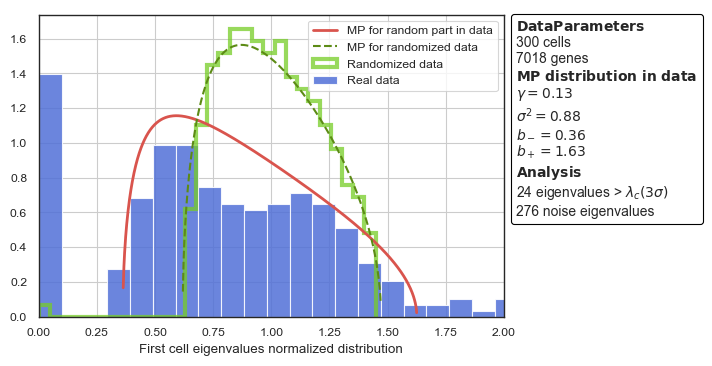

In [6]:
model.plot_mp(path='Figures/mp.pdf')

Marchenko - Pastur eigenvalues are associated with noise.
The eigenvalues above MP are associated with signal. 
One can plot projected gene variance on the lower, middle and upper spectrum of the Marchenko - Pastur distribution and compare with projection on signal eigenvectors to obtain what genes are contributing to the signal the most.

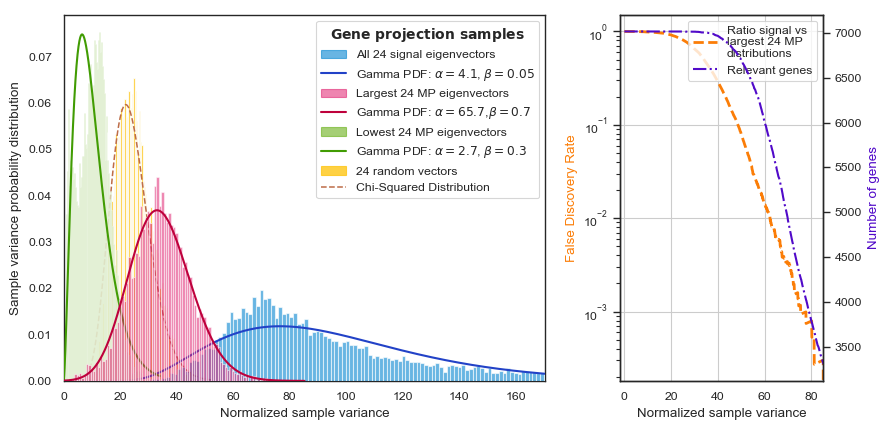

In [7]:
model.plot_statistics(path='Figures/statistics.pdf')


As a result of the fitting, the model keeps the information about
    1. All principal eigenvalues
    2. signal principal eigenvalues
    3. noise principal eigenvalues

  

In [8]:
#print(model.L)
#print(model.Ls)
#print(model.Ln)
#print(model.signal_genes)


2-dimensional visualizations tSNE and PCAs are available via public functions fit_tsne() and fit_pca().

In [9]:
model.fit_tsne()

computing t-SNE, using Multicore t-SNE for 4 jobs
atribute embedding is updated with t-SNE coordinates


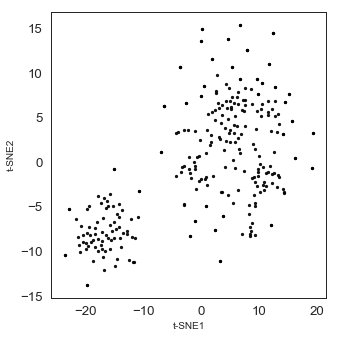

In [10]:
model.plot(path='../tsne.pdf')

Kmeans clustering

In [12]:
model.fit_kmeans(n_clusters=2)

<Figure size 500x550 with 0 Axes>

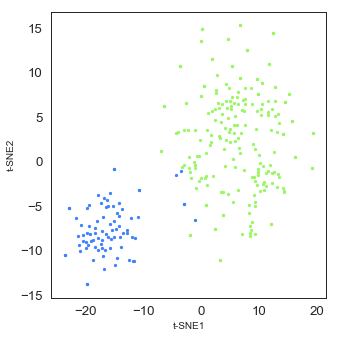

In [13]:
model.plot(labels=model.labels)

One can extract denoised matrix using public function return_cleaned() to obtain pandas Dataframe cells vs genes. 
Number of genes are controlled using False Discovery Rate parameter fdr. 
fdr = 1 corresponds to all the genes.
Default fdr = 0.001

In [14]:
df2 = model.return_cleaned(fdr=0.001)

In [18]:
print(df2.shape)
df2.head()

(300, 4032)


,AP006222.2,ISG15,AGRN,SDF4,PUSL1,AURKAIP1,MRPL20,ANKRD65,SSU72,GNB1,...,MT-CO2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
0,-0.535925,-1.031127,0.771419,-0.032929,-0.425401,-1.481761,-1.070600,-0.664337,-0.820984,-1.927997,...,1.413619,0.708427,1.218811,1.400296,1.449691,0.806245,1.571566,1.240448,1.093230,1.329970
1,1.437667,0.518606,0.689346,0.833298,-0.734627,0.699356,0.478695,-1.092318,0.810579,0.545647,...,-0.085337,-0.616587,-0.084131,-0.217293,0.041312,-0.322297,-0.226015,0.032472,-0.251066,-0.172762
2,0.124191,0.112116,-0.029824,-0.121394,0.404999,0.298775,0.508917,-0.139802,0.467323,0.128801,...,-0.236276,0.069682,-0.131058,-0.168182,-0.116495,-0.196197,-0.249970,-0.252835,0.007539,-0.126559
3,-0.031822,0.065342,0.226153,0.053830,-0.157871,0.171383,0.331359,0.023902,0.269700,-0.006065,...,0.031773,-0.296085,0.243590,0.146821,0.183046,-0.039187,0.101150,-0.005559,0.083587,0.182880
4,-0.100092,-0.400737,1.178109,0.840673,-0.101454,0.022807,-0.093509,-0.175684,-0.602671,0.459058,...,1.194783,-0.208447,1.022602,1.346399,1.271374,0.969850,1.093091,0.446794,0.897483,0.748186


At the false discovery rate, the 4032 genes were selected for 300 cells